**EDA in Tobacco Consumptions**

**Preparations**

**importing thelibraries and load the files needed for our EDA**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(color_codes=True)
plt.style.use('bmh')

**Load and read file**

In [2]:
df = pd.read_csv('/content/tobacco_use.csv')
df.head(5)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2017,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,"(13.444304, 144.793731)",BEH,100BEH,110CSA,2GEN,8AGE,6RAC,6EDU,BRF21,21
1,2018,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF27,27
2,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF28,28
3,2016,GU,Guam,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,%,Percentage,...,"(13.444304, 144.793731)",BEH,150BEH,177SCU,1GEN,8AGE,4RAC,6EDU,BRF69,69
4,2014,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,"(13.444304, 144.793731)",BEH,100BEH,110CSA,1GEN,8AGE,5RAC,6EDU,BRF22,22


In [3]:
df.tail(5)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
43336,2011,RI,Rhode Island,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,%,Percentage,...,"(41.70828019300046, -71.52247031399963)",BEH,150BEH,177SCU,1GEN,4AGE,6RAC,6EDU,BRF70,70
43337,2013-2014,MA,Massachusetts,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,NaN,%,Percentage,...,"(42.27687047000046, -72.08269067499964)",BEH,100BEH,112CS2,1GEN,8AGE,3RAC,6EDU,BRF32,32
43338,2015,AK,Alaska,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,"(64.84507995700051, -147.72205903599973)",BEH,100BEH,110CSA,1GEN,6AGE,6RAC,4EDU,BRF24,24
43339,2014,IA,Iowa,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),User Status,BRFSS,Current,%,Percentage,...,"(42.46940091300047, -93.81649055599968)",BEH,150BEH,179SUS,2GEN,8AGE,6RAC,6EDU,BRF80,80
43340,2018,MD,Maryland,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Frequency,BRFSS,Some Days,%,Percentage,...,"(39.29058096400047, -76.60926011099963)",BEH,100BEH,166SSP,1GEN,8AGE,6RAC,6EDU,BRF26,26


**columns information**

In [4]:
df['id'] = df.index + 1
df.dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43341 entries, 0 to 43340
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        43341 non-null  object 
 1   LocationAbbr                43341 non-null  object 
 2   LocationDesc                43341 non-null  object 
 3   TopicType                   43341 non-null  object 
 4   TopicDesc                   43341 non-null  object 
 5   MeasureDesc                 43341 non-null  object 
 6   DataSource                  43341 non-null  object 
 7   Response                    15018 non-null  object 
 8   Data_Value_Unit             43341 non-null  object 
 9   Data_Value_Type             43341 non-null  object 
 10  Data_Value                  41224 non-null  float64
 11  Data_Value_Footnote_Symbol  2117 non-null   object 
 12  Data_Value_Footnote         2117 non-null   object 
 13  Data_Value_Std_Err          411

**removing id and the features with 30% or less NaN values**

In [5]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: Data_Value_Footnote_Symbol, Data_Value_Footnote, id, 



**dropping the rows**

In [6]:
columns_to_drop = ['GeoLocation', 'TopicId', 'MeasureId', 'StratificationID1', 'StratificationID2', 'StratificationID3', 'StratificationID4', 'SubMeasureID']
columns_to_drop = list(set(columns_to_drop) & set(df.columns))
df = df.drop(columns=columns_to_drop)
df.head(5)


,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,TopicTypeId,DisplayOrder
0,2017,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,2.3,25.4,34.6,692.0,Male,All Races,All Ages,All Grades,BEH,21
1,2018,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,NaN,NaN,NaN,Overall,All Races,All Ages,All Grades,BEH,27
2,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,%,Percentage,...,NaN,NaN,NaN,NaN,Overall,All Races,All Ages,All Grades,BEH,28
3,2016,GU,Guam,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,%,Percentage,...,0.4,0.0,1.2,123.0,Overall,Hispanic,All Ages,All Grades,BEH,69
4,2014,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,4.9,12.4,31.4,209.0,Overall,White,All Ages,All Grades,BEH,22


**Shape of the dataset**

In [7]:
df.shape

(43341, 21)

**Duplicate rows shape**

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


**count number of the rows**

In [9]:
df.count()

YEAR                     43341
LocationAbbr             43341
LocationDesc             43341
TopicType                43341
TopicDesc                43341
MeasureDesc              43341
DataSource               43341
Response                 15018
Data_Value_Unit          43341
Data_Value_Type          43341
Data_Value               41224
Data_Value_Std_Err       41146
Low_Confidence_Limit     41146
High_Confidence_Limit    41146
Sample_Size              41146
Gender                   43341
Race                     43341
Age                      43341
Education                43341
TopicTypeId              43341
DisplayOrder             43341
dtype: int64

**Dropping duplicate rows**

In [10]:
df = df.drop_duplicates()
df.head(5)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,TopicTypeId,DisplayOrder
0,2017,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,2.3,25.4,34.6,692.0,Male,All Races,All Ages,All Grades,BEH,21
1,2018,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,NaN,NaN,NaN,Overall,All Races,All Ages,All Grades,BEH,27
2,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,%,Percentage,...,NaN,NaN,NaN,NaN,Overall,All Races,All Ages,All Grades,BEH,28
3,2016,GU,Guam,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,%,Percentage,...,0.4,0.0,1.2,123.0,Overall,Hispanic,All Ages,All Grades,BEH,69
4,2014,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,4.9,12.4,31.4,209.0,Overall,White,All Ages,All Grades,BEH,22


In [11]:
df.count()

YEAR                     43341
LocationAbbr             43341
LocationDesc             43341
TopicType                43341
TopicDesc                43341
MeasureDesc              43341
DataSource               43341
Response                 15018
Data_Value_Unit          43341
Data_Value_Type          43341
Data_Value               41224
Data_Value_Std_Err       41146
Low_Confidence_Limit     41146
High_Confidence_Limit    41146
Sample_Size              41146
Gender                   43341
Race                     43341
Age                      43341
Education                43341
TopicTypeId              43341
DisplayOrder             43341
dtype: int64

**Dropping the missing values columns**

In [12]:
print(df.isnull().sum())

YEAR                         0
LocationAbbr                 0
LocationDesc                 0
TopicType                    0
TopicDesc                    0
MeasureDesc                  0
DataSource                   0
Response                 28323
Data_Value_Unit              0
Data_Value_Type              0
Data_Value                2117
Data_Value_Std_Err        2195
Low_Confidence_Limit      2195
High_Confidence_Limit     2195
Sample_Size               2195
Gender                       0
Race                         0
Age                          0
Education                    0
TopicTypeId                  0
DisplayOrder                 0
dtype: int64


**Summary Statistics**

In [13]:
print(df.describe())

         Data_Value  Data_Value_Std_Err  Low_Confidence_Limit  \
count  41224.000000        41146.000000          41146.000000   
mean      25.355041            1.710589             22.010864   
std       25.002587            1.715646             24.135141   
min        0.000000            0.000000              0.000000   
25%        5.100000            0.600000              3.200000   
50%       17.100000            1.100000             14.300000   
75%       38.900000            2.200000             30.500000   
max       99.900000           16.600000             99.800000   

       High_Confidence_Limit   Sample_Size  DisplayOrder  
count           41146.000000  41146.000000  43341.000000  
mean               28.679347   3050.171171     47.079278  
std                26.209196   3798.872768     24.494487  
min                 0.000000     50.000000      5.000000  
25%                 6.900000    480.000000     24.000000  
50%                19.800000   1798.000000     51.000000  
7

**Visualizing tobacco consumption**

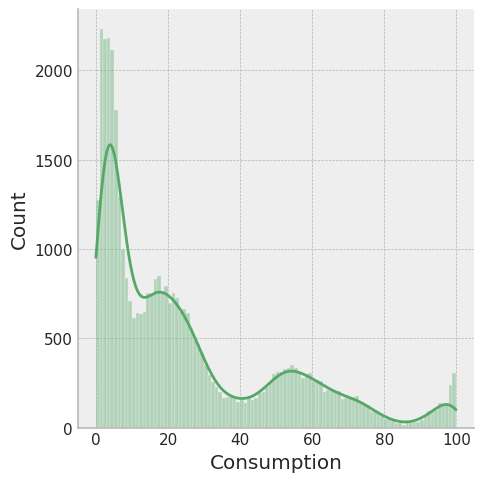

In [14]:
sns.displot(df['Data_Value'], color='g', bins=100, kde=True, alpha=0.4)
plt.xlabel('Consumption')
plt.show()

**Visualizing Display Order**

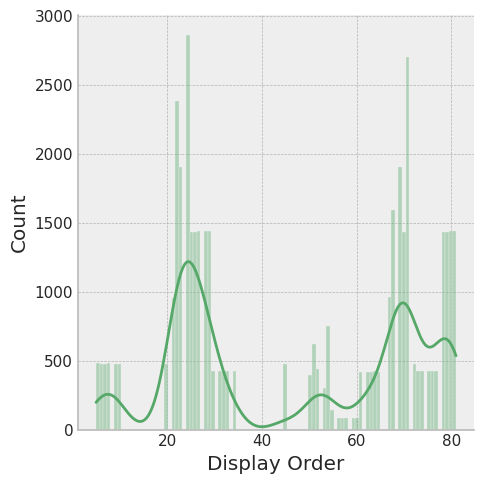

In [15]:
sns.displot(df['DisplayOrder'], color='g', bins=100, kde=True, alpha=0.4)
plt.xlabel('Display Order')
plt.show()

**Data Cleaning:**

In [16]:
print(df.isnull().sum())

YEAR                         0
LocationAbbr                 0
LocationDesc                 0
TopicType                    0
TopicDesc                    0
MeasureDesc                  0
DataSource                   0
Response                 28323
Data_Value_Unit              0
Data_Value_Type              0
Data_Value                2117
Data_Value_Std_Err        2195
Low_Confidence_Limit      2195
High_Confidence_Limit     2195
Sample_Size               2195
Gender                       0
Race                         0
Age                          0
Education                    0
TopicTypeId                  0
DisplayOrder                 0
dtype: int64


**Adding Not Answered into Missing Values of Response**

In [17]:
df['Response'].fillna('Not Answered', inplace=True)
df.tail(5)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,TopicTypeId,DisplayOrder
43336,2011,RI,Rhode Island,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,Not Answered,%,Percentage,...,0.2,0.2,1.0,2003.0,Overall,All Races,65 Years and Older,All Grades,BEH,70
43337,2013-2014,MA,Massachusetts,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking – (2 yrs – Race/Ethnicity),BRFSS,Not Answered,%,Percentage,...,1.4,5.5,11.1,749.0,Overall,Asian/Pacific Islander,All Ages,All Grades,BEH,32
43338,2015,AK,Alaska,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,Not Answered,%,Percentage,...,2.3,22.9,31.7,928.0,Overall,All Races,Age 20 and Older,12th Grade,BEH,24
43339,2014,IA,Iowa,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),User Status,BRFSS,Current,%,Percentage,...,0.7,8.4,11.4,3253.0,Male,All Races,All Ages,All Grades,BEH,80
43340,2018,MD,Maryland,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Frequency,BRFSS,Some Days,%,Percentage,...,1.7,29.6,36.2,1869.0,Overall,All Races,All Ages,All Grades,BEH,26


**Adding 0 into the Data_Value missing value column**

In [18]:
columns_to_fillna = ['Data_Value', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size']
df[columns_to_fillna] = df[columns_to_fillna].fillna(0).copy()
df.head(5)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,TopicTypeId,DisplayOrder
0,2017,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,Not Answered,%,Percentage,...,2.3,25.4,34.6,692.0,Male,All Races,All Ages,All Grades,BEH,21
1,2018,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,0.0,0.0,0.0,0.0,Overall,All Races,All Ages,All Grades,BEH,27
2,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,%,Percentage,...,0.0,0.0,0.0,0.0,Overall,All Races,All Ages,All Grades,BEH,28
3,2016,GU,Guam,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,Not Answered,%,Percentage,...,0.4,0.0,1.2,123.0,Overall,Hispanic,All Ages,All Grades,BEH,69
4,2014,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,Not Answered,%,Percentage,...,4.9,12.4,31.4,209.0,Overall,White,All Ages,All Grades,BEH,22


**After Handling missing values checking the rows**

In [19]:
print(df.isnull().sum())

YEAR                     0
LocationAbbr             0
LocationDesc             0
TopicType                0
TopicDesc                0
MeasureDesc              0
DataSource               0
Response                 0
Data_Value_Unit          0
Data_Value_Type          0
Data_Value               0
Data_Value_Std_Err       0
Low_Confidence_Limit     0
High_Confidence_Limit    0
Sample_Size              0
Gender                   0
Race                     0
Age                      0
Education                0
TopicTypeId              0
DisplayOrder             0
dtype: int64


**Detecting Outliers**

Text(0.5, 0, 'Consumption')

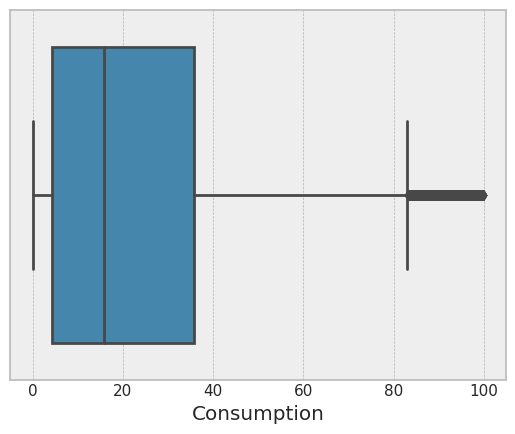

In [20]:
sns.boxplot(x=df['Data_Value'])
plt.xlabel('Consumption')

Text(0.5, 0, 'Standard Error for Consumption')

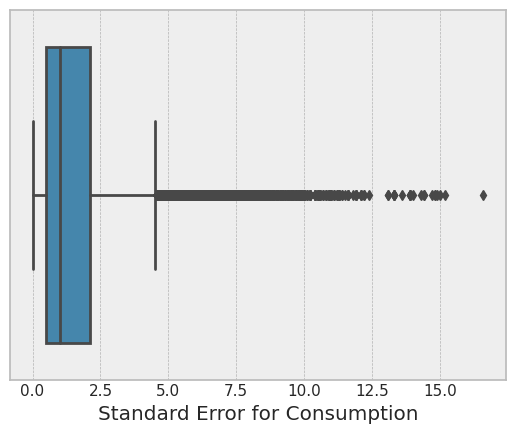

In [21]:
sns.boxplot(x=df['Data_Value_Std_Err'])
plt.xlabel('Standard Error for Consumption')

Text(0.5, 0, 'Low Confidence Limit for Consumption')

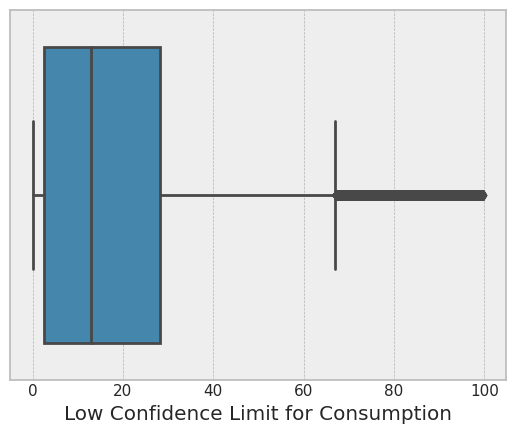

In [22]:
sns.boxplot(x=df['Low_Confidence_Limit'])
plt.xlabel('Low Confidence Limit for Consumption')

Text(0.5, 0, 'High Confidence Limit for Consumption')

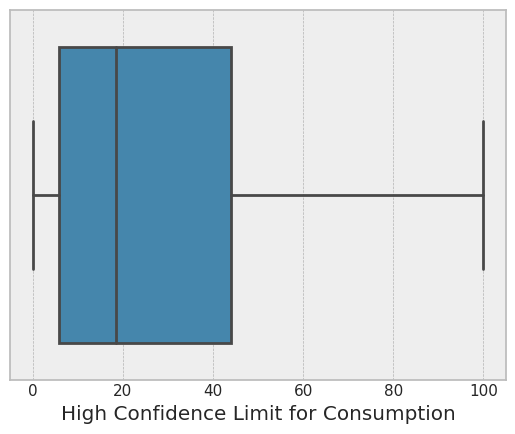

In [23]:
sns.boxplot(x=df['High_Confidence_Limit'])
plt.xlabel('High Confidence Limit for Consumption')

Text(0.5, 0, 'Display Order')

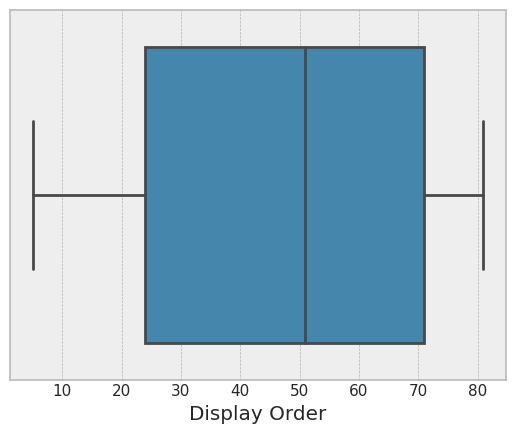

In [24]:
sns.boxplot(x=df['DisplayOrder'])
plt.xlabel('Display Order')

**performing IQR-InterQuartile Range**

In [25]:
Q1 = df.quantile(0.25,numeric_only=True)
Q3 = df.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1
print(IQR)

Data_Value                 31.5
Data_Value_Std_Err          1.6
Low_Confidence_Limit       25.8
High_Confidence_Limit      38.1
Sample_Size              3638.0
DisplayOrder               47.0
dtype: float64


In [26]:
df, Q1 = df.align(Q1, axis=1, copy=False)
df, Q3 = df.align(Q3, axis=1, copy=False)
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(35596, 21)

**Visualization:Factors to affecting tobacco consumption declined**

**Tobacco Consumption Decline by State:**

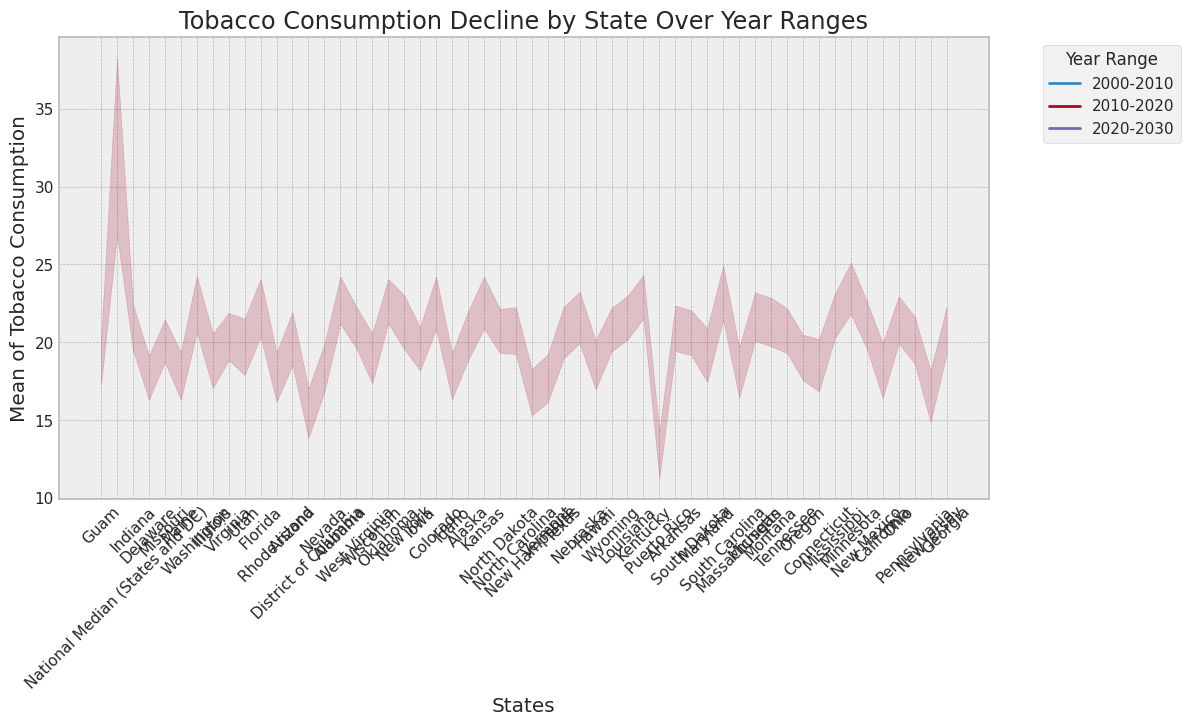

In [27]:
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
year_bins = pd.cut(df['YEAR'], bins=[2000, 2010, 2020, 2030], labels=['2000-2010', '2010-2020', '2020-2030'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='LocationDesc', y='Data_Value', hue=year_bins, markers=True,alpha=0.)
plt.title('Tobacco Consumption Decline by State Over Year Ranges')
plt.xlabel('States')
plt.ylabel('Mean of Tobacco Consumption')
plt.legend(title='Year Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


**Tobacco Consumption Decline by Age:**

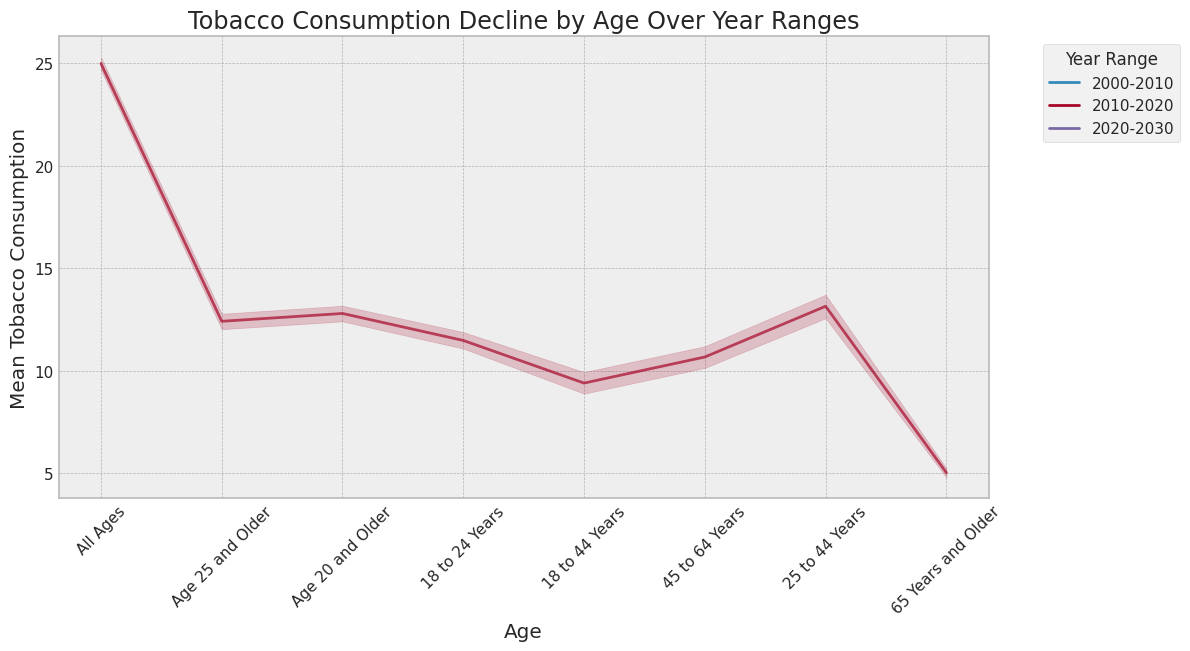

In [28]:
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
year_bins = pd.cut(df['YEAR'], bins=[2000, 2010, 2020, 2030], labels=['2000-2010', '2010-2020', '2020-2030'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Age', y='Data_Value', hue=year_bins, markers=True,alpha=0.7)
plt.title('Tobacco Consumption Decline by Age Over Year Ranges')
plt.xlabel('Age')
plt.ylabel('Mean Tobacco Consumption')
plt.legend(title='Year Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

**Tobacco Consumption Decline Over Years:**

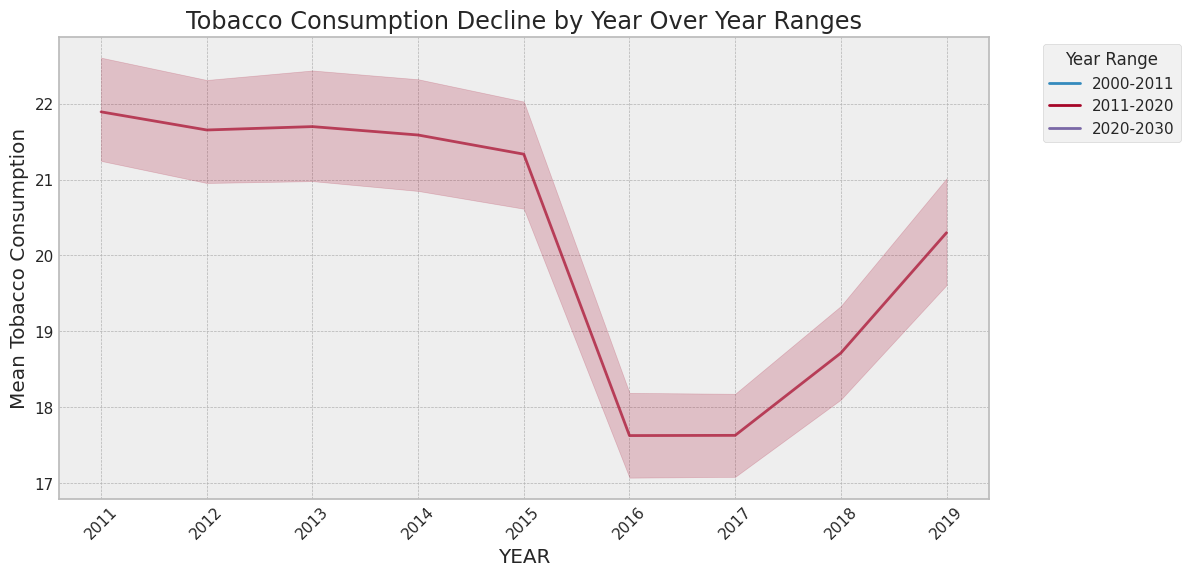

In [29]:
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
year_bins = pd.cut(df['YEAR'], bins=[2000, 2010, 2020, 2030], labels=['2000-2011', '2011-2020', '2020-2030'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='YEAR', y='Data_Value', hue=year_bins, markers=True,alpha=0.7)
plt.title('Tobacco Consumption Decline by Year Over Year Ranges')
plt.xlabel('YEAR')
plt.ylabel('Mean Tobacco Consumption')
plt.legend(title='Year Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


**Tobacco Consumption Decline by Smoking Frequency:**

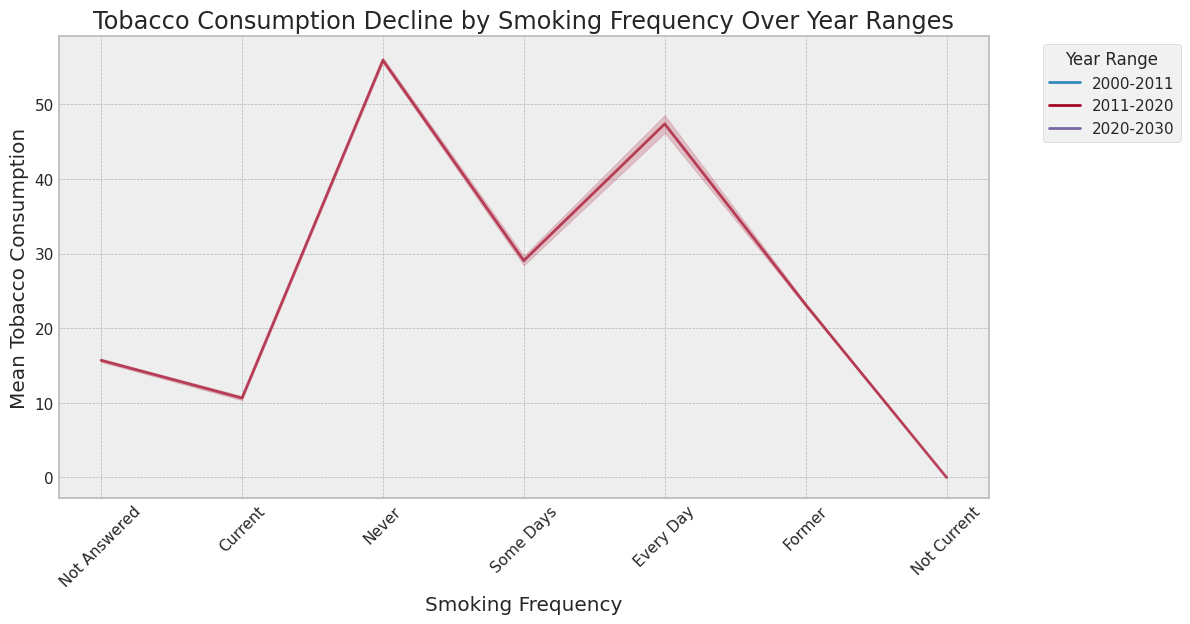

In [30]:
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
year_bins = pd.cut(df['YEAR'], bins=[2000, 2010, 2020, 2030], labels=['2000-2011', '2011-2020', '2020-2030'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Response', y='Data_Value', hue=year_bins, markers=True,alpha=0.7)
plt.title('Tobacco Consumption Decline by Smoking Frequency Over Year Ranges')
plt.xlabel('Smoking Frequency')
plt.ylabel('Mean Tobacco Consumption')
plt.legend(title='Year Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


**Tobacco Consumption Decline by Education:**

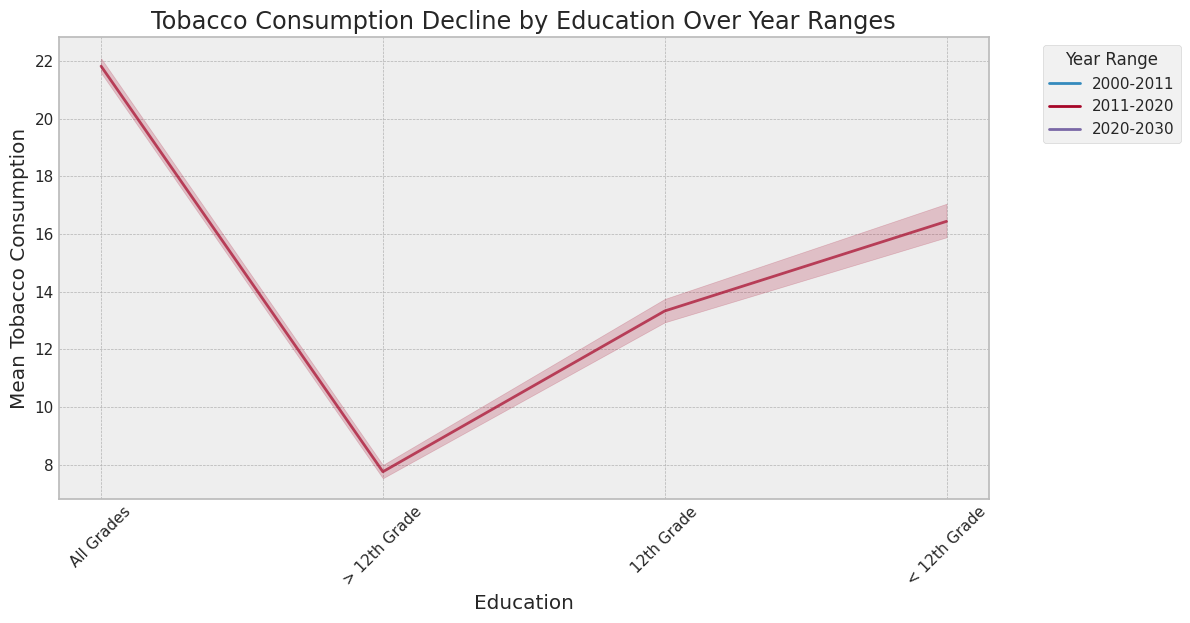

In [31]:

df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

year_bins = pd.cut(df['YEAR'], bins=[2000, 2010, 2020, 2030], labels=['2000-2011', '2011-2020', '2020-2030'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Education', y='Data_Value', hue=year_bins, markers=True,alpha=0.7)
plt.title('Tobacco Consumption Decline by Education Over Year Ranges')
plt.xlabel('Education')
plt.ylabel('Mean Tobacco Consumption')
plt.legend(title='Year Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

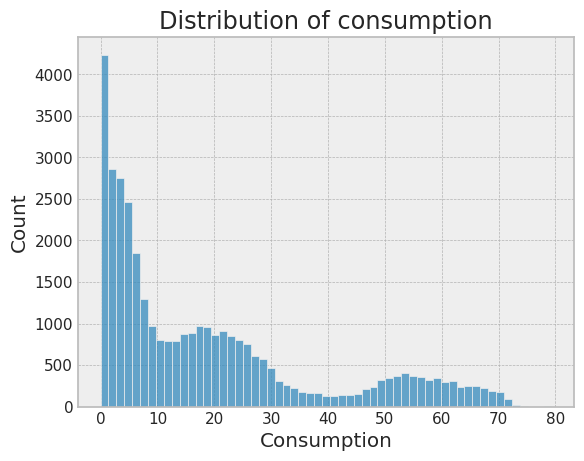

In [32]:
sns.histplot(df['Data_Value'])
plt.title('Distribution of consumption')
plt.xlabel('Consumption')
plt.show()




<ipython-input-33-3078a4dc436f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


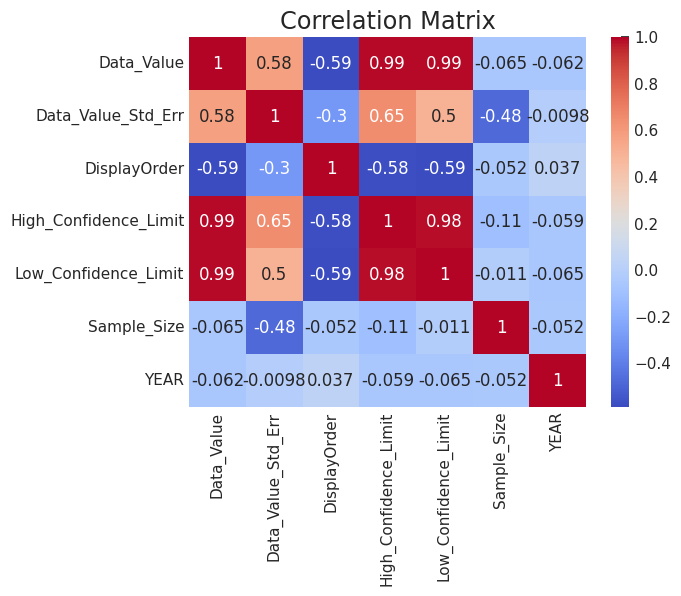

In [33]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



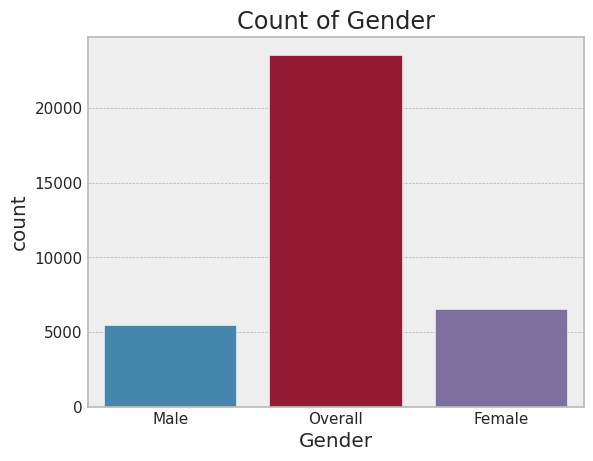

In [34]:
sns.countplot(x=df['Gender'])
plt.title('Count of Gender')
plt.show()

**Explore Relationships**

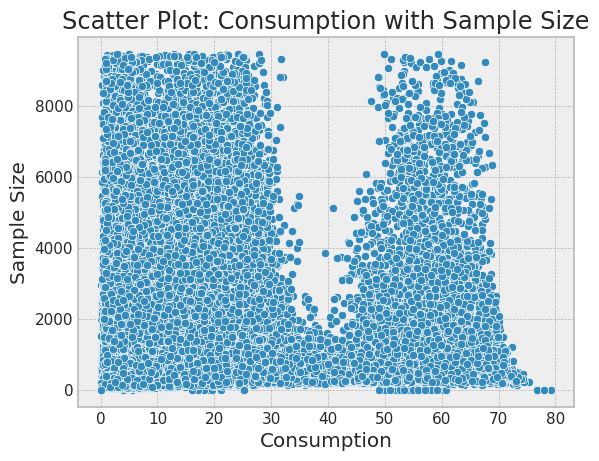

In [35]:
sns.scatterplot(x='Data_Value', y='Sample_Size', data=df)
plt.title('Scatter Plot: Consumption with Sample Size')
plt.xlabel('Consumption')
plt.ylabel('Sample Size')
plt.show()



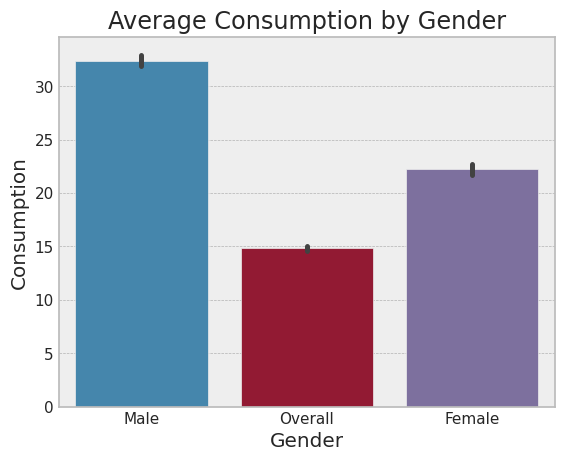

In [36]:
sns.barplot(x='Gender', y='Data_Value', data=df)
plt.title('Average Consumption by Gender')
plt.ylabel('Consumption')
plt.show()

**Explore Trends Over Time**

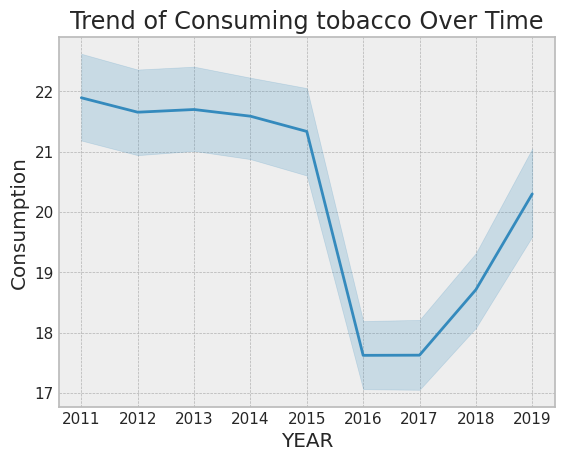

In [37]:
sns.lineplot(x='YEAR', y='Data_Value', data=df)
plt.title('Trend of Consuming tobacco Over Time')
plt.ylabel('Consumption')
plt.show()


**Statistics**

**Descriptive Statistics:**

In [38]:
mean_value = df['Data_Value'].mean()
median_value = df['Data_Value'].median()
std_dev = df['Data_Value'].std()

print(f'Mean: {mean_value}, Median: {median_value}, Standard Deviation: {std_dev}')


Mean: 18.88370322508147, Median: 12.2, Standard Deviation: 19.386668860826475


**Grouped Analysis:**

In [39]:
state_grouped = df.groupby('LocationDesc')['Data_Value'].mean()
age_grouped = df.groupby('Age')['Data_Value'].mean()


**Hypothesis Testing:**

In [40]:
from scipy.stats import ttest_ind
smokers = df[df['Response'] == 'Every Day']['Data_Value']
non_smokers = df[df['Response'] == 'Never']['Data_Value']
t_stat, p_value = ttest_ind(smokers, non_smokers)
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: -10.853532056329021, p-value: 5.846943063333861e-27


**Comparing Smoking Rates Between Different Gender:**

Null Hypothesis (H0): There is no significant difference in smoking rates between different Gender.
Alternative Hypothesis (H1): There is a significant difference in smoking rates between different Gender.

In [41]:
import pandas as pd
from scipy.stats import ttest_ind

response_column = 'Response'
gender_column = 'Gender'

df[response_column] = pd.to_numeric(df[response_column], errors='coerce')

male_data = df[df[gender_column] == 'Male'][response_column].dropna()
female_data = df[df[gender_column] == 'Female'][response_column].dropna()

t_statistic, p_value = ttest_ind(male_data, female_data, equal_var=False)

alpha = 0.05

if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in smoking rates between males and females.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in smoking rates between males and females.')

Fail to reject the null hypothesis. There is no significant difference in smoking rates between males and females.


**Comparing Smoking Rates Between Age Groups:**

Null Hypothesis (H0): There is no significant difference in smoking rates between different Age Group. Alternative Hypothesis (H1): There is a significant difference in smoking rates between different Age Group.

In [42]:

from scipy.stats import ttest_ind

response_column = 'Response'
age_column = 'Age'

df[response_column] = pd.to_numeric(df[response_column], errors='coerce')

age_groups = df[age_column].unique()
grouped_data = {age_group: df[df[age_column] == age_group][response_column].dropna() for age_group in age_groups}

alpha = 0.05
significant_differences = []

for i in range(len(age_groups) - 1):
    for j in range(i + 1, len(age_groups)):
        age_group1 = age_groups[i]
        age_group2 = age_groups[j]
        data1 = grouped_data[age_group1]
        data2 = grouped_data[age_group2]

        t_statistic, p_value = ttest_ind(data1, data2, equal_var=False)

        if p_value < alpha:
            significant_differences.append((age_group1, age_group2))

if significant_differences:
    print('Reject the null hypothesis. There is a significant difference in smoking rates between the following age groups:')
    for age_group1, age_group2 in significant_differences:
        print(f'{age_group1} and {age_group2}')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in smoking rates between different age groups.')

Fail to reject the null hypothesis. There is no significant difference in smoking rates between different age groups.


**Comparing Smoking Rates Between States:**

Null Hypothesis (H0): There is no significant difference in smoking rates between different States. Alternative Hypothesis (H1): There is a significant difference in smoking rates between different States.

**Comparing Smoking Rates Between Education:**

Null Hypothesis (H0): There is no significant difference in smoking rates between different Education Types. Alternative Hypothesis (H1): There is a significant difference in smoking rates between different Education Type.

In [43]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Education'], df['LocationDesc'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 Value: {chi2}")
print(f"P-value: {p}")

alpha = 0.05

if p < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Chi2 Value: 117.6817735561651
P-value: 0.9940774996943229
Fail to reject the null hypothesis: No significant difference.


**Correlation Analysis:**

In [44]:
correlation = df['Data_Value'].corr(df['Sample_Size'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: -0.06490664667663136


**The state with the most number of people who never smoke**

In [45]:
df= pd.read_csv('/content/tobacco_use.csv')
never_smoked_data = df[df['Response'] == 'Never']

if not never_smoked_data.empty:

    state_sample_size = never_smoked_data.groupby('LocationDesc')['Sample_Size'].sum()

    max_state = state_sample_size.idxmax()
    max_sample_size = state_sample_size.max()

    print(f"The state with the most number of people who never smoked is {max_state} with a total sample size of {max_sample_size}.")
else:
    print("No data found for people who never smoked.")

The state with the most number of people who never smoked is Florida with a total sample size of 453091.0.


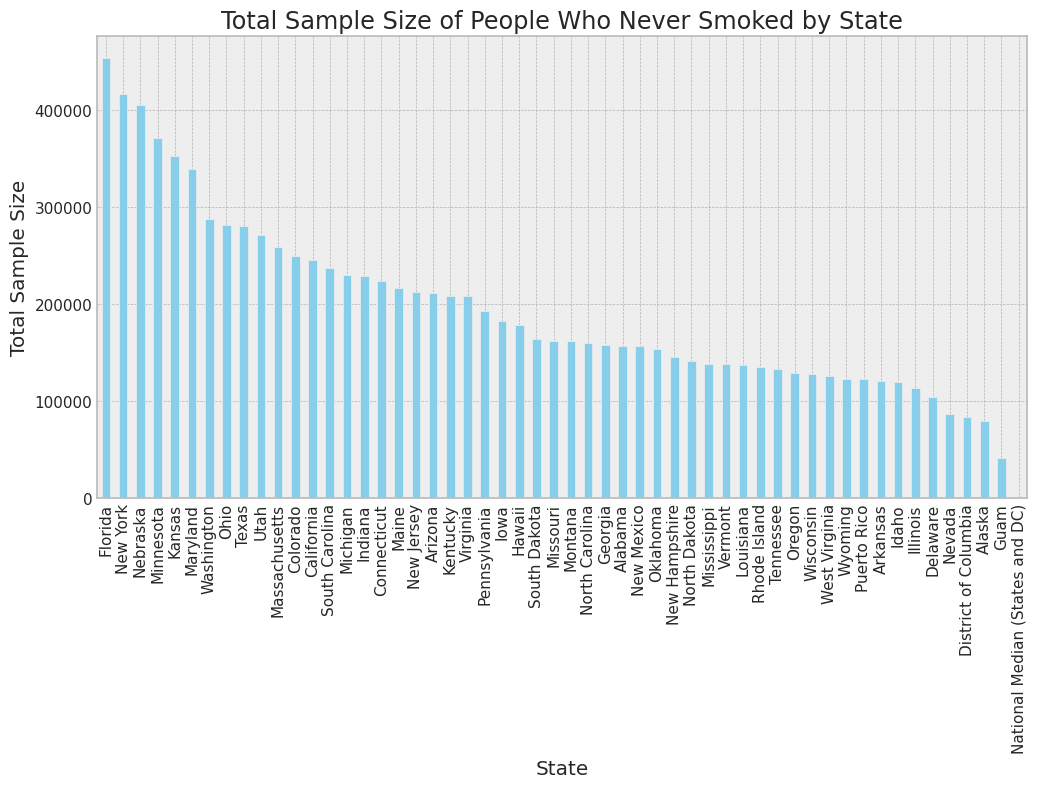

In [46]:
import matplotlib.pyplot as plt

never_smoked_data = df[df['Response'] == 'Never']

if not never_smoked_data.empty:

    state_sample_size = never_smoked_data.groupby('LocationDesc')['Sample_Size'].sum()

    plt.figure(figsize=(12, 6))
    state_sample_size.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title('Total Sample Size of People Who Never Smoked by State')
    plt.xlabel('State')
    plt.ylabel('Total Sample Size')
    plt.show()
else:
    print("No data found for people who never smoked.")


**The state with the most number of people who smoke every day**

In [47]:
df= pd.read_csv('/content/tobacco_use.csv')
every_day_smokers_data = df[df['Response'] == 'Every Day']

if not every_day_smokers_data.empty:

    state_sample_size = every_day_smokers_data.groupby('LocationDesc')['Sample_Size'].sum()

    max_state = state_sample_size.idxmax()
    max_sample_size = state_sample_size.max()

    print(f"The state with the most number of people who smoke every day is {max_state} with a total sample size of {max_sample_size}.")
else:
    print("No data found for people who smoke every day.")

The state with the most number of people who smoke every day is Florida with a total sample size of 66223.0.


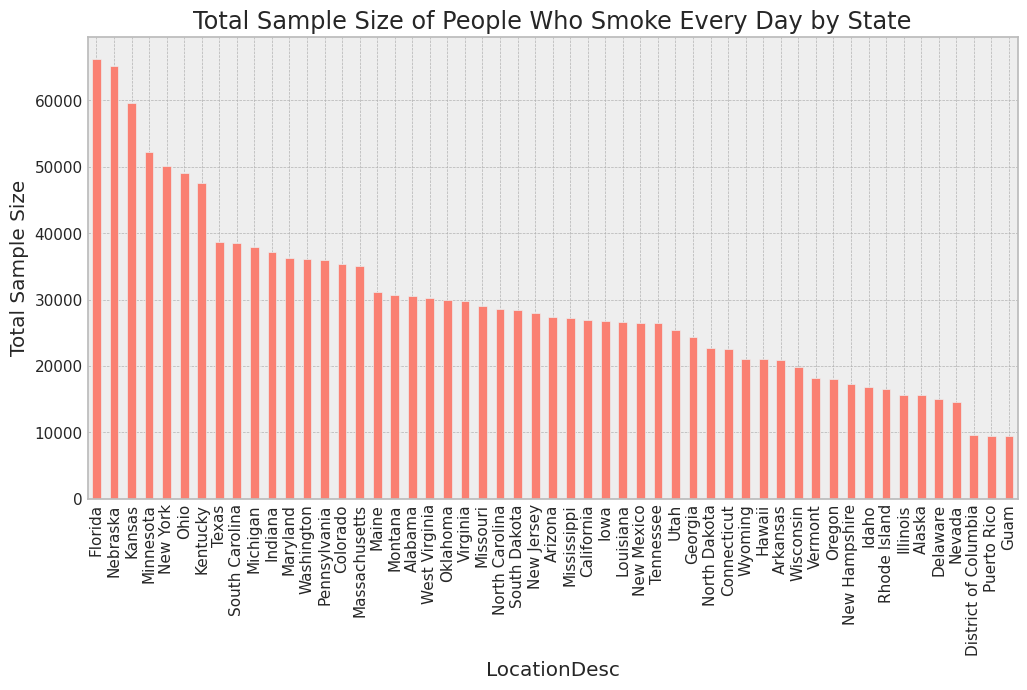

In [ ]:
every_day_smokers_data = df[df['Response'] == 'Every Day']

state_sample_size = every_day_smokers_data.groupby('LocationDesc')['Sample_Size'].sum()

state_sample_size = state_sample_size.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
state_sample_size.plot(kind='bar', color='salmon')
plt.title('Total Sample Size of People Who Smoke Every Day by State')
plt.xlabel('LocationDesc')
plt.ylabel('Total Sample Size')
plt.show()


**Display if there is any trend over the years in cigarette use**

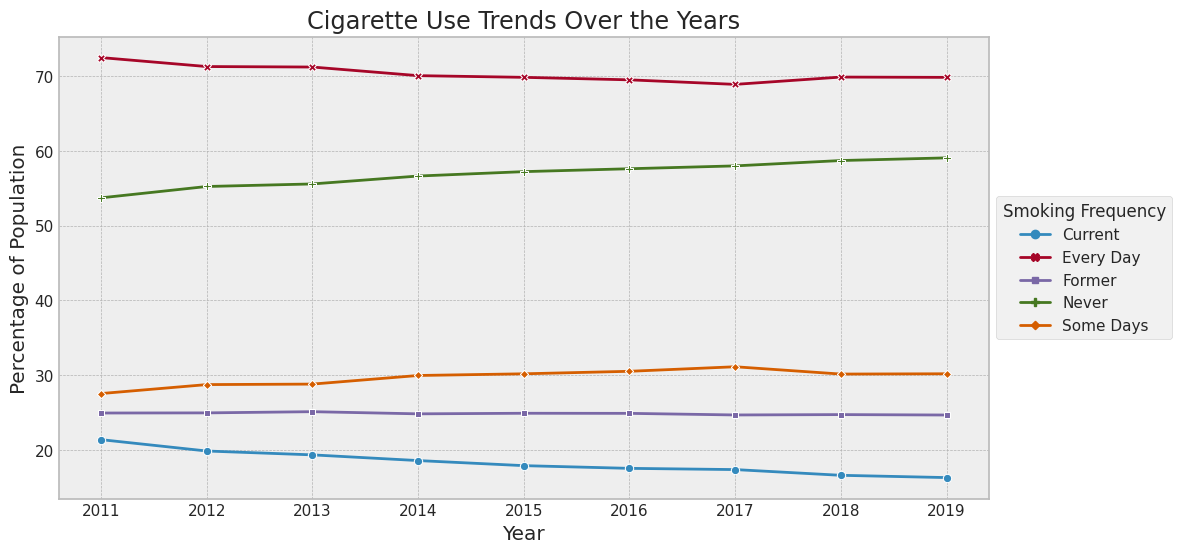

In [48]:
cigarette_data = df[df['TopicType'] == 'Tobacco Use – Survey Data']
cigarette_data = cigarette_data[cigarette_data['TopicDesc'] == 'Cigarette Use (Adults)']

pivot_table = cigarette_data.pivot_table(index='YEAR', columns='Response', values='Data_Value', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, markers=True, dashes=False)
plt.title('Cigarette Use Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Smoking Frequency', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



**Age Groups to find tobacco use by 'Age'with smoking types**

<ipython-input-49-900319c4c1c7>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='Data_Value', hue='TopicDesc', data=age_data, ci=None, palette='muted')


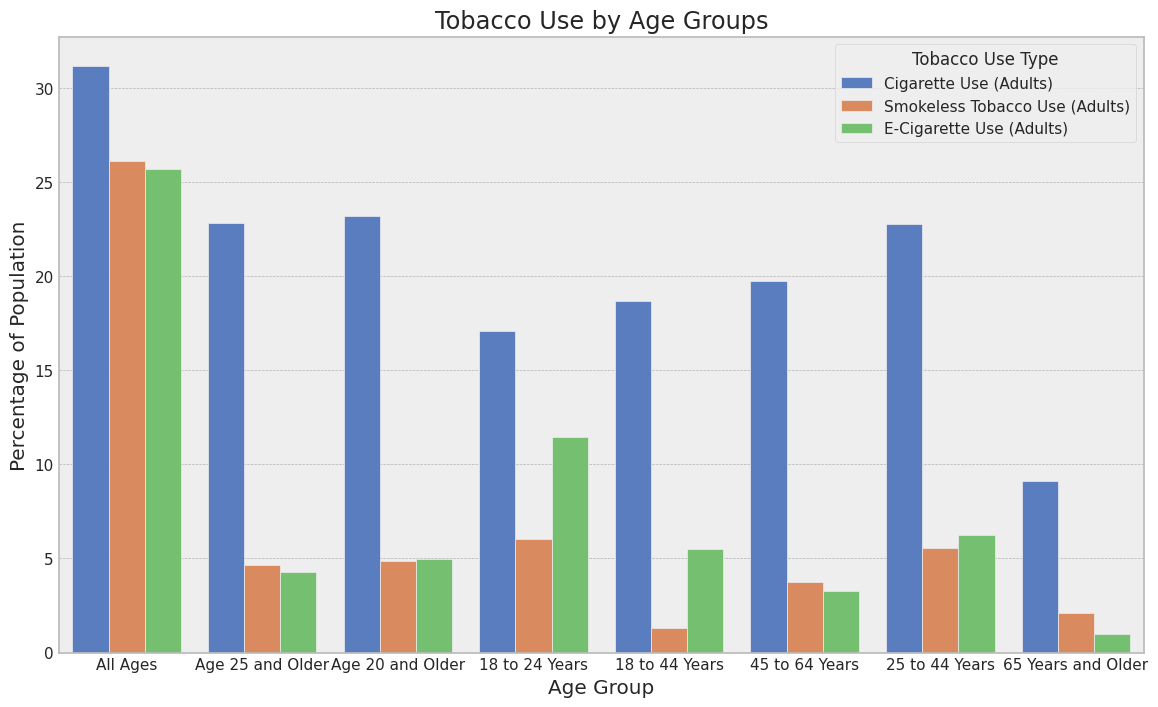

In [49]:
age_data = df[['YEAR', 'Age', 'TopicDesc', 'Response', 'Data_Value','TopicType']]

selected_topics = ['Cigarette Use (Adults)', 'E-Cigarette Use (Adults)', 'Smokeless Tobacco Use (Adults)']
age_data = age_data[age_data['TopicType'] == 'Tobacco Use – Survey Data']
age_data = age_data[age_data['TopicDesc'].isin(selected_topics)]

plt.figure(figsize=(14, 8))
sns.barplot(x='Age', y='Data_Value', hue='TopicDesc', data=age_data, ci=None, palette='muted')
plt.title('Tobacco Use by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Population')
plt.legend(title='Tobacco Use Type')
plt.show()

<ipython-input-50-1137d07cfbb4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Age', y='Data_Value', hue='TopicDesc', data=age_data, ci=None, palette='muted')


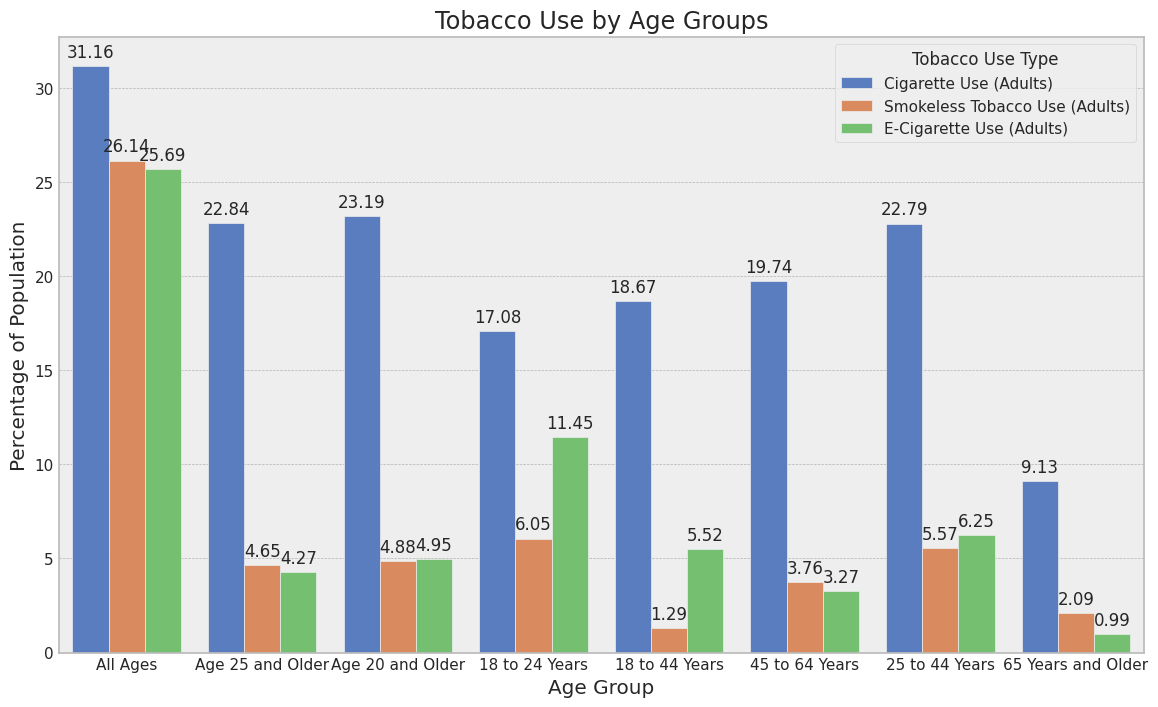

In [50]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Age', y='Data_Value', hue='TopicDesc', data=age_data, ci=None, palette='muted')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

bar_labels = {'Cigarette Use (Adults)': 'Cigarette Use',
              'Smokeless Tobacco Use (Adults)': 'Smokeless Tobacco Use',
              'E-Cigarette Use (Adults)': 'E-Cigarette Use'}

ax.set_xticklabels([bar_labels.get(topic, topic) for topic in ax.get_xticklabels()])

plt.title('Tobacco Use by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Population')
plt.legend(title='Tobacco Use Type')
plt.show()

**Visualizing Age and Smokers data using pie chart**

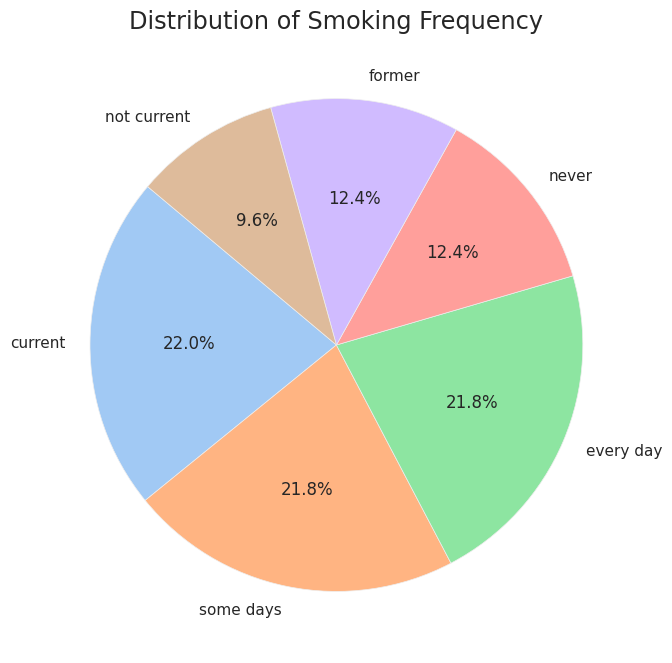

In [51]:
df['Response'] = df['Response'].str.strip().str.lower()

freq_counts = df['Response'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(freq_counts, labels=freq_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Smoking Frequency')
plt.show()




**tobacco consumption with different Levels of Education**

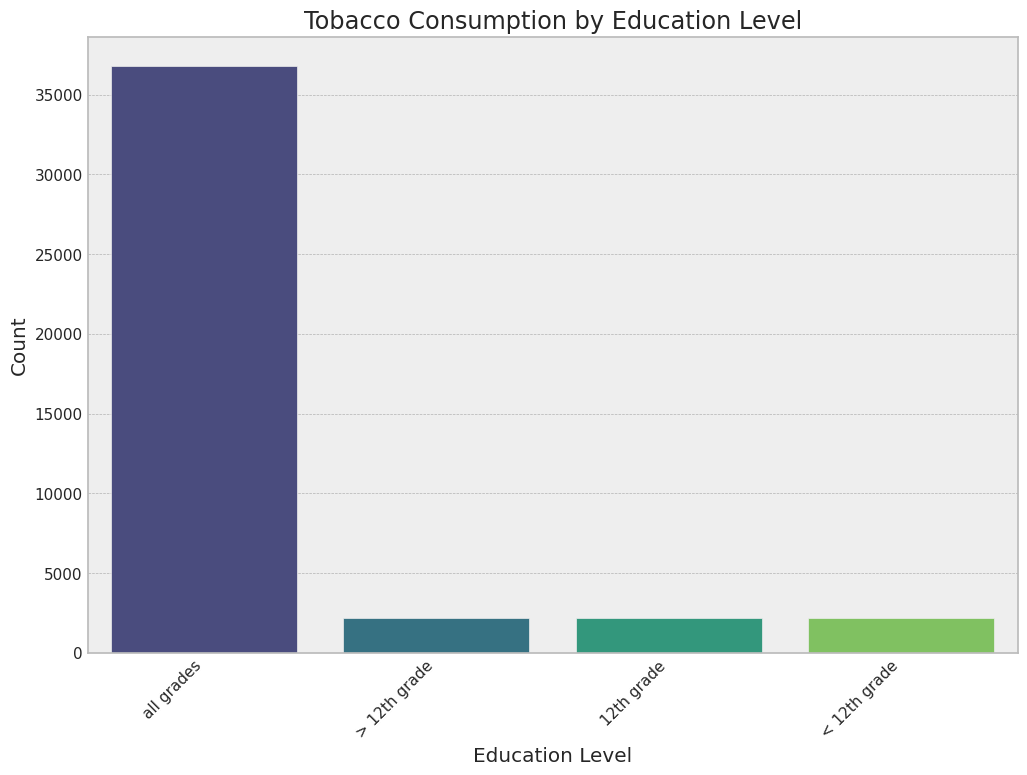

In [52]:
df['Education'] = df['Education'].str.strip().str.lower()

plt.figure(figsize=(12, 8))
sns.countplot(x='Education', data=df, palette='viridis')
plt.title('Tobacco Consumption by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# **Model Creating and Evaluating:**

In [98]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, PrecisionRecallDisplay, RocCurveDisplay, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
df=pd.read_csv("/content/tobacco_use.csv")
df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2017,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,Not Answer,%,Percentage,...,"(13.444304, 144.793731)",BEH,100BEH,110CSA,2GEN,8AGE,6RAC,6EDU,BRF21,21
1,2018,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF27,27
2,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF28,28
3,2016,GU,Guam,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,Not Answer,%,Percentage,...,"(13.444304, 144.793731)",BEH,150BEH,177SCU,1GEN,8AGE,4RAC,6EDU,BRF69,69
4,2014,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,Not Answer,%,Percentage,...,"(13.444304, 144.793731)",BEH,100BEH,110CSA,1GEN,8AGE,5RAC,6EDU,BRF22,22


### Dropping unused columns

In [99]:
columns_to_drop = ["MeasureDesc","Response","Race","LocationAbbr", "TopicType", "DataSource", "Data_Value_Unit", "Data_Value_Type","Data_Value_Footnote_Symbol","Data_Value_Footnote","GeoLocation","TopicTypeId","TopicId","MeasureId","StratificationID1","StratificationID2","StratificationID3","StratificationID4","SubMeasureID","DisplayOrder"]  # Replace with actual column names
df = df.drop(columns=columns_to_drop, errors='ignore')


# Drop null values

In [100]:
df = df.dropna()

# Removing Stop Words & Data Cleaning

In [101]:
stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
df['LocationDesc'] = df['LocationDesc'].apply(lambda x: ' '.join([word for word in str(x).lower().split() if word not in stop_words]))
df['TopicDesc'] = df['TopicDesc'].apply(lambda x: ' '.join([word for word in str(x).lower().split() if word not in stop_words]))

In [138]:
df.head(2)

,YEAR,LocationDesc,TopicDesc,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender_Male,Gender_Overall,Age_18 to 44 Years,Age_25 to 44 Years,Age_45 to 64 Years,Age_65 Years and Older,Age_Age 20 and Older,Age_Age 25 and Older,Age_All Ages,Education_< 12th Grade,Education_> 12th Grade,Education_All Grades
0,2017,guam,cigarette use (adults),30.0,2.3,25.4,34.6,692.0,1,0,0,0,0,0,0,0,1,0,0,1
3,2016,guam,smokeless tobacco use (adults),0.5,0.4,0.0,1.2,123.0,0,1,0,0,0,0,0,0,1,0,0,1


# **Data Preprocessing:**

Handle Categorical Variables:

In [103]:

df = pd.get_dummies(df, columns=['Gender', 'Age', 'Education'], drop_first=True)


# Feature Selection:

In [120]:
X = df.drop(['Data_Value'], axis=1)
y = df['Data_Value']

# **Train-Test Split:**

In [121]:
from sklearn.model_selection import train_test_split
X['YEAR'] = X['YEAR'].str.extract('(\d+)').astype(float)
X = pd.get_dummies(X, columns=['LocationDesc'], drop_first=True)
X = pd.get_dummies(X, columns=['TopicDesc'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scalling the data points

In [122]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [123]:
X_train_prepared = mm.transform(X_train)
X_val_prepared = mm.transform(X_test)

# **Random Forest Model**

In [124]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)


# **Train the Model**

In [125]:
model.fit(X_train_prepared, y_train)


RandomForestRegressor(random_state=42)

# Predicting the Results with Actual

In [131]:
preds = model.predict(X_val_prepared)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': preds})


print(results_df)

       Actual  Predicted
4998     38.5     38.568
25454     0.5      0.500
34844     1.5      1.500
17445    13.2     13.171
13400    46.6     46.688
...       ...        ...
19533    28.9     28.933
975      25.2     25.178
35479     2.3      2.300
40687    64.5     64.447
16758    57.5     57.461

[8230 rows x 2 columns]


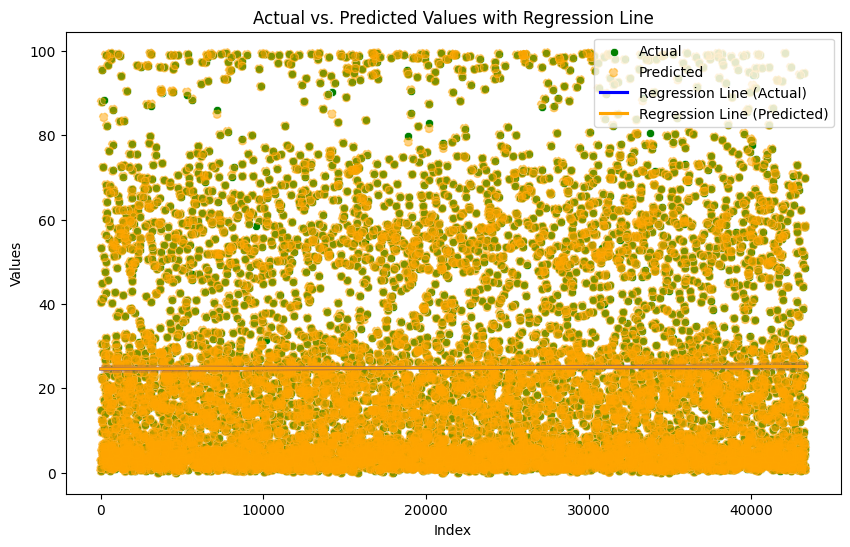

In [181]:
import seaborn as sns
plt.figure(figsize=(10, 6))


sns.scatterplot(x=results_df.index, y=results_df['Actual'], color='green', label='Actual', marker='o')


plt.scatter(results_df.index, results_df['Predicted'], color='orange', alpha=0.5, label='Predicted', marker='o', linestyle='dashed')


sns.regplot(x=results_df.index, y='Actual', data=results_df, scatter=False, color='blue', label='Regression Line (Actual)')
sns.regplot(x=results_df.index, y='Predicted', data=results_df, scatter=False, color='orange', label='Regression Line (Predicted)')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values with Regression Line')
plt.legend()
plt.show()

# **Evaluate the Model**

In [136]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, preds)
r_squared = r2_score(y_test, preds)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')


Mean Squared Error: 0.03353139319562569
R-squared: 0.9999443231544389


# Interpret Results

In [137]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                   Feature    Importance
3    High_Confidence_Limit  8.746883e-01
2     Low_Confidence_Limit  1.252730e-01
1       Data_Value_Std_Err  1.403005e-05
4              Sample_Size  9.048102e-06
0                     YEAR  4.007660e-06
..                     ...           ...
8       Age_25 to 44 Years  2.950782e-08
7       Age_18 to 44 Years  1.507929e-08
9       Age_45 to 64 Years  9.420173e-09
15  Education_> 12th Grade  6.212830e-09
10  Age_65 Years and Older  4.720478e-09

[72 rows x 2 columns]


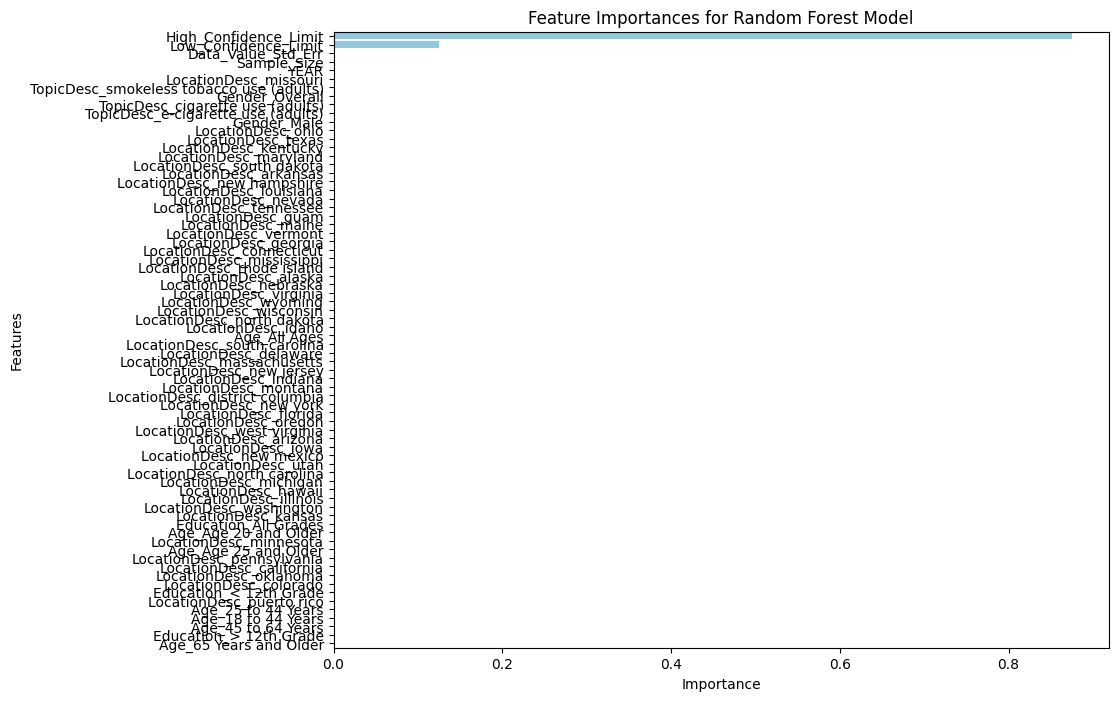

In [185]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Random Forest Model')
plt.show()

## **Linear Regression Model**

In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


X = df[['YEAR', 'Age_18 to 44 Years', 'Age_25 to 44 Years', 'Age_45 to 64 Years', 'Age_65 Years and Older', 'Education_< 12th Grade', 'Education_> 12th Grade', 'Education_All Grades']]
y = df['Data_Value']


X = X.copy()


X['YEAR'] = X['YEAR'].str.extract('(\d+)').astype(float)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')



r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

coefficients = dict(zip(X.columns, model.coef_))
coefficients_df = pd.DataFrame(list(coefficients.items()), columns=['Feature', 'Coefficient'])

print(coefficients_df)



Mean Squared Error: 532.7627341949892
R-squared: 0.11537977860274728
                  Feature  Coefficient
0                    YEAR    -0.180135
1      Age_18 to 44 Years   -21.058069
2      Age_25 to 44 Years   -17.263933
3      Age_45 to 64 Years   -20.010944
4  Age_65 Years and Older   -25.384656
5  Education_< 12th Grade     3.705100
6  Education_> 12th Grade    -5.695385
7    Education_All Grades    17.086655


In [152]:
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients_df)

                  Feature  Coefficient  Abs_Coefficient
4  Age_65 Years and Older   -25.384656        25.384656
1      Age_18 to 44 Years   -21.058069        21.058069
3      Age_45 to 64 Years   -20.010944        20.010944
2      Age_25 to 44 Years   -17.263933        17.263933
7    Education_All Grades    17.086655        17.086655
6  Education_> 12th Grade    -5.695385         5.695385
5  Education_< 12th Grade     3.705100         3.705100
0                    YEAR    -0.180135         0.180135


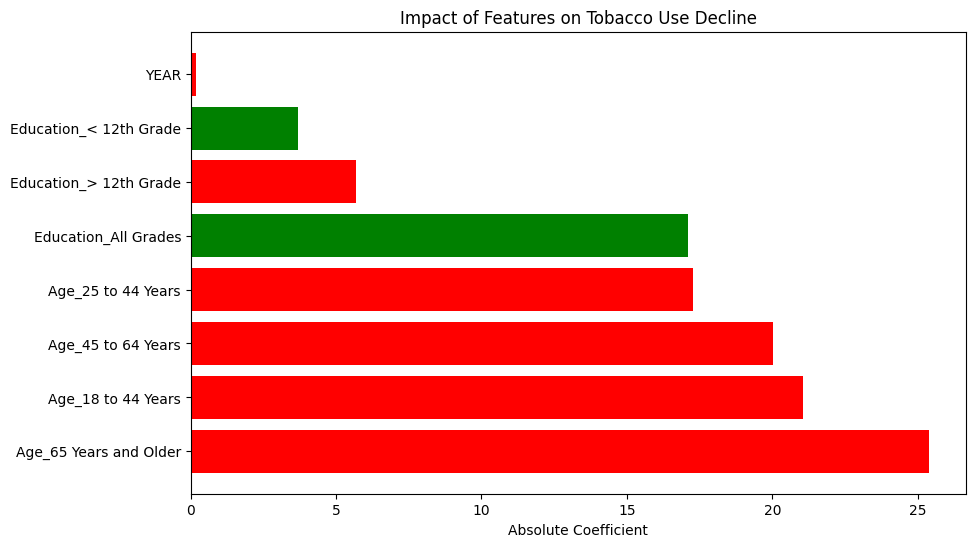

In [157]:
import matplotlib.pyplot as plt
import numpy as np
colors = np.where(coefficients_df['Coefficient'] > 0, 'green', 'red')
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Abs_Coefficient'], color=colors)
plt.xlabel('Absolute Coefficient')
plt.title('Impact of Features on Tobacco Use Decline')
plt.show()